### 2.1 線形モデル
#### 線形モデルの導入
観測値$y$に「未知母数の線形式+誤差」という構造を仮定する線形モデルが分散分析や回帰分析の基本モデルとして幅広く用いられる。
簡単な例として、ある物体の重さ$\mu$を計測するモデル
$$
y=\mu+\varepsilon
$$
を考える。
ここで、$\varepsilon$は、偶然誤差である。
計測を独立に$n$回繰り返すことにすると、繰返し測定のモデル
$$
y_i=\mu+\varepsilon_i,\hspace{5mm}i=1,\cdots,n
$$
が得られる。
$n$個の測定値に対して未知数は$n+1$個あるので$\mu$を正確に知ることはできない。
そこで個々の誤差を知ることはあきらめて、確率的なふるまいを推定することにする。
$\varepsilon_i$がたがいに独立に期待値0、分散$\sigma^2$の正規分布$N(0,\sigma^2)$に従うという仮定である。
もし、正規分布が仮定できれば、$\sigma^2$を推定することにより、誤差のふるまいが推定できることになる。
このように、誤差に正規性を仮定する線形モデルはとくに正規線形モデルという。

#### 真の値μと誤差εの分離
誤差$\varepsilon_i$は正規分布$N(0,\sigma^2)$に、したがって$y_i$は$N(\mu,\sigma^2)$に従うとする。
ここで、$N(10,1^2)$に従う乱数を独立に10個発生させたものを「x」で示す。
同じような実験を10回繰り返し、各界の平均のみを「o」で示す。明らかに平均の方が散らばり具合が小さく、かつ横軸10の近くに集まっている。

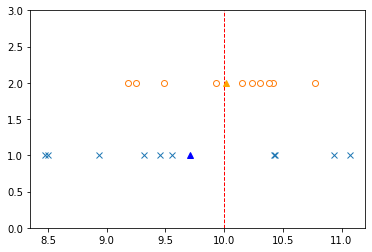

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(loc=10, scale=1, size=10)
x_means = [np.mean(np.random.normal(loc=10, scale=1, size=10)) for _ in range(10)]

plt.plot(x, np.ones(len(x)), 'x')
plt.plot(np.mean(x), 1, '^', color='blue')

plt.plot(x_means, np.ones(len(x_means))*2, 'o', markerfacecolor='white')
plt.plot(np.mean(x_means), 2, '^', color='orange')

plt.vlines(10, 0, 3, linestyle='--', linewidth=1, color='red')

plt.ylim(0,3);

いま、$y_1,\cdots,y_n$が互いに独立に正規分布$N(10,1^2)$に従って分布しているとする。
このとき平均$\bar{y}$はまた正規分布に従い、期待値は、
$$
\begin{align}
E(\bar{y})&=E\{(y_1+\cdots+y_n)/n \}\\
&=\{E(y_1)+\cdots+E(y_n) \}/n=10
\end{align}
$$
分散は、
$$
\begin{align}
Var(\bar{y})&=V\{(y_1+\cdots+y_n)/n \}\\
&=\{V(y_1)+\cdots+V(y_n) \}/n^2=1/n
\end{align}
$$
となる。
下図のように中心は同じまま平均の分布の方がばらつきが小さくなる。

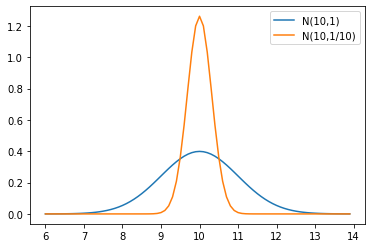

In [48]:
from scipy.stats import norm

x = np.arange(6,14, 0.1)

y1 = norm.pdf(x, loc=10, scale=1)
y2 = norm.pdf(x, loc=10, scale=1/np.sqrt(10))

plt.plot(x, y1, label='N(10,1)');
plt.plot(x, y2, label='N(10,1/10)');
plt.legend();

#### 大数の弱法則
いま、$\varepsilon_1,\cdots,\varepsilon_n$がたがいに無相関で期待値0、分散$\sigma^2$の分布に従っているとすると、
$$
E(\bar{y})=\mu,\hspace{5mm} V(\bar{y})=\sigma^2/n
$$
このときチェビシェフの不等式によって、
$$
P(|\bar{y}-\mu|\geq \delta)\leq \frac{\sigma^2}{n\delta^2}
$$
が成り立つ。
ここで、$\delta$がどんなに小さな正定数であっても、$n$を十分大きくとることにより、右辺はいくらでも小さくすることができる。

#### 推定量の良さ
$n$とともに$\mu$の近くに集中してくる推定量は$\bar{y}$の他にいくらでも考えられる。
たとえば、$y_1,\cdots,y_n$の中央値$y_{med}$やホッジス・レーマン推定量
$$
y_{HL}=\bigl( あらゆる\frac{y_i+y_j}{2}(ただしi\leq j)の中央値 \bigr)
$$
などもその性質を満たしている。
いま、誤差$\varepsilon_i$は性質
1)不偏性：$E(\varepsilon_i)=0$
2)等分散性：$V(\varepsilon_i)=\sigma^2$
3)無相関性：$Cov(\varepsilon_i,\varepsilon_j)=0\ (i\neq j)$

を満たす確率変数であるとする。
ここで$y_i$の線形結合で表される不偏な推定量
$$
l_1y_1+l_2y_2+\cdots+l_ny_n
$$
の中で最小分散のものを考える。
まず、誤差についての仮定を用いて計算すると、
$$
V(\sum l_iy_i)=\sum V(l_iy_i)=(\sum l_i^2)\sigma^2
$$
であることがわかる。
一方、不変性の条件
$$
E(\sum l_iy_i)=\mu
$$
は
$$
E(\sum l_iy_i)=\sum E(l_iy_i)=\sum l_i\mu = \mu
$$
と表され、これが任意の$\mu$について成り立たねばならないから、
$$
\sum l_i=1
$$
となるべきである。
そこで、量$\sum l_i^2$を条件$\sum l_i=1$の下で最小にすると
$$
l_1=l_2=\cdots=\_n=1/n
$$
が解となり
$$
\sum l_iy_i=\sum y_i/n=\bar{y}
$$
が得られる。
すなわち、$\bar{y}$は線形な推定量に限って考えれば、誤差に関する仮定の下で最小分散の不偏推定量であることが言える。
このような推定量を最良線形不偏推定量(BLUE)と呼ぶ。
もっと一般の線形モデルで、いちいちこのような分散最小化問題を解くことなくBLUEを得ようとするのが最小二乗法である。

誤差の分布がコーシー分布のように期待値、分散が存在しないような分布では、中央値やホッジス・レーマン推定量の方が良い推定量となる。

#### 行列による表現
ある処理の$a$通りの水準について、それぞれ$r$回の実験を無作為化して行い、各処理効果$\alpha_i$を比較するための1元配置のモデル
$$
y_{ij}=\mu+\alpha_i+\varepsilon_{ij},\hspace{5mm}i=1,\cdots,a;\ j=1,\cdots,r
$$

や、要因$x$に関する多項式モデル
$$
y_i=\beta_0+\beta_1x_i+\beta_2x_i^2+\varepsilon_i,\hspace{5mm}i=1,\cdots,n
$$
などは、みな、線形モデルである。

いま、観測値のベクトルを列ベクトルで
$$
\boldsymbol{y}=(y_1,\cdots,y_n)'
$$
未知母数のベクトルを一般的に
$$
\boldsymbol{\theta}=(\theta_1,\cdots,\theta_p)'
$$
既知係数行列を$\boldsymbol{X}$、そして誤差ベクトルを、
$$
\boldsymbol{\varepsilon}=(\varepsilon_1,\cdots,\varepsilon_n)'
$$
とすると、線形モデルは一般的に
$$
\boldsymbol{y}=\boldsymbol{X}\boldsymbol{\theta}+\boldsymbol{\varepsilon}
$$
と表すことができる。
$n$行$p$列の行列$\boldsymbol{X}$は実験の計画によって定まる係数行列なので、とくに計画行列と呼ぶ。

誤差$\boldsymbol{\varepsilon}$についての過程は零ベクトル$\boldsymbol{0}$、単位行列$\boldsymbol{I}$を用いて、

1 不偏性：$E(\boldsymbol{\varepsilon})=\boldsymbol{0}$
2,3 等分散性、無相関性：$V(\boldsymbol{\varepsilon})=\sigma^2\boldsymbol{I}$

のように表される。
ただし、$E(\boldsymbol{\varepsilon})$は平均$E(\varepsilon_i),i=1,\cdots,n$からなる平均ベクトル、同じく$V(\boldsymbol{\varepsilon_i})$は共分散$Cov(\varepsilon_i,\varepsilon_j)$、分散$V(\varepsilon_i^2)(i=jのとき)$からなる分散共分散行列を表す。

### 最小二乗法
#### 最小二乗法の原理
線形モデルで、未知母数$\boldsymbol{\theta}$のある係数$\boldsymbol{l}=(l_1,\cdots,l_p)'$による線形結合
$$
\boldsymbol{l}'\boldsymbol{\theta}=l_1\theta_1+l_2\theta_2+\cdots+l_p\theta_p
$$
の線形推定量を考える。
たとえば、多項式モデルにおける$\beta_0,\beta_1,\beta_2$そのもの、あるいは説明変数の値$x$における予測値$\beta_0+\beta_1x+\beta_2x^2$などが$\boldsymbol{l}'\boldsymbol{\theta}$の例である。
これらは$\boldsymbol{\theta}=(\beta_0,\beta_1,\beta_2)'$に対し、それぞれ
$$
\boldsymbol{l}=(1,0,0)',\hspace{3mm}\boldsymbol{l}=(0,1,0)',\hspace{3mm}\boldsymbol{l}=(0,0,1)'
$$
あるいは$\boldsymbol{l}=(1,x,x^2)'$として$\boldsymbol{l}'\boldsymbol{\theta}$の形に表されるからである。

ここで$\boldsymbol{l}$とは無関係にデータ$\boldsymbol{y}$とその期待値の偏差二乗和
$$
\begin{align}
\boldsymbol{S}(\boldsymbol{\theta})&=|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}|^2\\
&=(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})'(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})
\end{align}
$$
を最小にする解$\boldsymbol{\theta}=\hat{\boldsymbol{\theta}}$を求めておき、単に$\boldsymbol{l}'\hat{\boldsymbol{\theta}}$とすることによって$\boldsymbol{l}'\boldsymbol{\theta}$のBLUEを求めようというのが最小二乗法の原理である。

#### 正規方程式
一般の線形モデルに対して
$$
\boldsymbol{X}'\boldsymbol{X}\boldsymbol{\theta}=\boldsymbol{X}'\boldsymbol{y}
$$
が得られる。
この式を$\boldsymbol{\theta}$の正規方程式という。
この解は推定量を表す意味で$\hat{\boldsymbol{\theta}}$のようにハットをつけて表す習慣がある。
$$
\begin{align}
S(\boldsymbol{\theta})&=\{\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}}+\boldsymbol{X}(\hat{\boldsymbol{\theta}}-\boldsymbol{\theta}) \}'\{\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}}+\boldsymbol{X}(\hat{\boldsymbol{\theta}}-\boldsymbol{\theta}) \}\\
&=(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}})'(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}})+(\boldsymbol{X}\hat{\boldsymbol{\theta}}-\boldsymbol{X}\boldsymbol{\theta})'(\boldsymbol{X}\hat{\boldsymbol{\theta}}-\boldsymbol{X}\boldsymbol{\theta})\geq S(\hat{\boldsymbol{\theta}})
\end{align}
$$
この式から$\boldsymbol{\theta}=\hat{\boldsymbol{\theta}}$が確かに$S(\boldsymbol{\theta})$を最小とすることがわかる。

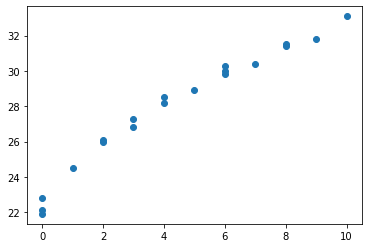

In [189]:
x = np.array([0,1,2,3,4,5,6,7,8,0,2,4,6,8,10,0,3,6,9])
y = np.array([22.1,24.5,26.0,26.8,28.2,28.9,30.0,30.4,31.4,21.9,26.1,28.5,30.3,31.5,33.1,22.8,27.3,29.8,31.8])

plt.plot(x, y, 'o');

X'X
 [[1.9000e+01 8.4000e+01 5.5000e+02]
 [8.4000e+01 5.5000e+02 4.0680e+03]
 [5.5000e+02 4.0680e+03 3.2374e+04]]
X'y
 [[  531.4]
 [ 2536.1]
 [16994.1]]
theta_hat
 [[22.56123063]
 [ 1.66802044]
 [-0.06795836]]


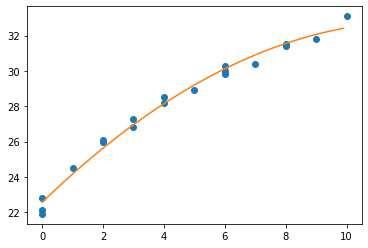

In [190]:
X = np.array([np.ones(len(x)), x, x**2]).T

print("X'X\n", X.T@X)
print("X'y\n", X.T@y.reshape(-1,1))

theta = np.linalg.inv(X.T@X)@(X.T@y.reshape(-1,1))
print('theta_hat\n', theta)

xx = np.arange(0,10,0.1)
XX = np.array([np.ones(len(xx)), xx, xx**2]).T

plt.plot(x, y, 'o');
plt.plot(xx, XX@theta);

注意しなければいけないのは任意の線形式$\boldsymbol{l}'\boldsymbol{\theta}$が推定可能とは限らないことである。
実際$\boldsymbol{X}$のランクが未知母数の次元より小さいと不定解の場合に当たり、$\hat{\boldsymbol{\theta}}$は一意には定まらない。
そこで、推論の対象を以下に定義する推定可能関数に限る必要がある。
線形モデルの母数に関する線形式$\boldsymbol{l}'\boldsymbol{\theta}$で、$\boldsymbol{y}$の線形式からなる不偏推定量が存在するものを推定可能関数という。
#### ガウス-マルコフの定理
推論を推定可能関数に限ると、次のような最小二乗法の基本定理が成り立つ
(定理)線形モデルに関する任意の推定可能関数$\boldsymbol{l}'\boldsymbol{\theta}$について$\boldsymbol{l}'\hat{\boldsymbol{\theta}}$が一意にBLUEを与える。ただし、$\boldsymbol{\theta}=\hat{\boldsymbol{\theta}}$は正規方程式
$$
\boldsymbol{X}'\boldsymbol{X}\hat{\boldsymbol{\theta}}=\boldsymbol{X}'\boldsymbol{y}
$$
を満たす任意の最小二乗解である。これをガウス・マルコフの定理という。

### 最小二乗推定量の分散
最小二乗推定量は線形推定量である。一般に線形推定量は
$$
t(\boldsymbol{y})=\boldsymbol{L}'\boldsymbol{y}=\sum L_iy_i
$$
と表すことができる。したがって、その分散は
$$
V(\boldsymbol{L}'\boldsymbol{y})=V(\sum L_iy_i)=\sum L_i^2V(y_i)=\boldsymbol{L}'\boldsymbol{L}\sigma^2
$$
のように求めることができる。とくに$\boldsymbol{X}$がフル・ランクの場合、推定量
$$
\boldsymbol{l}'\boldsymbol{\theta}=\boldsymbol{l}'(\boldsymbol{X}'\boldsymbol{X})^{-1}\boldsymbol{X}'\boldsymbol{y}
$$
の分散は
$$
\boldsymbol{l}'(\boldsymbol{X}'\boldsymbol{X})^{-1}\boldsymbol{X}'・\boldsymbol{X}(\boldsymbol{X}'\boldsymbol{X})^{-1}\boldsymbol{l}\sigma^2=\boldsymbol{l}'(\boldsymbol{X}'\boldsymbol{X})^{-1}\boldsymbol{l}\sigma^2
$$
で与えられる。
とくに$\hat{\theta}_i$自体の分散は$\boldsymbol{l}=(0,\cdots,0,1,0,\cdots,0)'$とおけば、$\boldsymbol{X}'\boldsymbol{X}$の対角要素から
$$
V(\hat{\theta}_i)=(\boldsymbol{X}'\boldsymbol{X})^{-1}\sigma^2の(i,i)要素
$$
として求められる。同様に
$$
Cov(\hat{\theta}_1,\hat{\theta}_j)=(\boldsymbol{X}'\boldsymbol{X})^{-1}\sigma^2の(i,j)要素
$$
のように表すことができる。

回帰分析でよく用いる
$$
y_i=\beta_0^*+\beta_1(x_i-\bar{x})+\varepsilon_i
$$
の場合、係数行列は
$$
\boldsymbol{X}=(\boldsymbol{j}\ \boldsymbol{x^*}),\hspace{3mm}\boldsymbol{x^*}=(x_1-\bar{x},\cdots,x_n-\bar{x})'
$$
という形をしており、

$$
\boldsymbol{X}'\boldsymbol{X}=
\begin{pmatrix}
\boldsymbol{j}'\boldsymbol{j}&\boldsymbol{j}'\boldsymbol{x^*}\\
\boldsymbol{x^{*'}}\boldsymbol{j}&\boldsymbol{x^{*'}}\boldsymbol{x^*}
\end{pmatrix}
=
\begin{pmatrix}
n&O\\
O&S_{xx}^{-1}
\end{pmatrix}
$$

だから

$$
(\boldsymbol{X}'\boldsymbol{X})^{-1}=
\begin{pmatrix}
n^{-1}&O\\
O&S_{xx}^{-1}
\end{pmatrix}
$$

である。
$\boldsymbol{\theta}=(\beta_0^*,\beta_1)',\boldsymbol{l}=(1,0)',(0,1)'$とすると、
$$
V(\hat{\beta}_0^*)=\sigma^2\\
V(\hat{\beta}_1^*)=\sigma^2/S_{xx}=\sigma^2/\sum (x_i-\bar{X})^2
$$
が得られる。また、
$$
\beta_0^*+\beta_1(x-\bar{x})=(1,x-\bar{x})\boldsymbol{\theta}
$$
と表せるから、予測式のばらつきとして
$$
\begin{align}
V(\hat{\beta_0^*+\beta_1(x-\bar{x})})&=(1,x-\bar{x})\begin{pmatrix}n^{-1}&O\\O&S_{xx}^{-1}\end{pmatrix}\begin{pmatrix}1\\x-\bar{x}\end{pmatrix}\sigma^2\\
&=\biggl(\frac{1}{n}+\frac{(x-\bar{x})^2}{S_{xx}} \biggr)
\end{align}
$$

#### 誤差分布の推定
最小二乗法により線形モデルをあてはめた後の残差$\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}}$の二乗和
$$
S(\hat{\boldsymbol{\theta}})=(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}})'(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}})
$$
は残差平方和と呼ばれ、線形モデルの誤差分散$\sigma^2$に関する情報を担っている。
$\boldsymbol{X}\hat{\boldsymbol{\theta}}=\prod_\boldsymbol{X}\boldsymbol{y}$が$\boldsymbol{y}$の推定空間$L(\boldsymbol{X})$への射影にあったのに対し、残差
$$
\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}}=(\boldsymbol{I}-\prod_\boldsymbol{X})\boldsymbol{y}
$$
は、$L(\boldsymbol{X})$の直交補空間への正射影である。
ここで、残差平方和の期待値は、
$$
E(S(\hat{\boldsymbol{\theta}}))=(n-q)\sigma^2,\hspace{5mm}q=rank(\boldsymbol{X})
$$
と表される。したがって、
$$
\nu_e=n-q
$$
とし、それによって
$$
\begin{align}
\hat{\sigma}^2&=S(\hat{\boldsymbol{\theta}})/\nu_e\\
&=(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}})'(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}})/\nu_e
\end{align}
$$
とおくと、これが誤差分散$\sigma^2$の不偏推定量を与える。$\nu_e$は自由度と呼ばれる。
残差平方和の計算は次の式が便利である。
$$
S(\hat{\boldsymbol{\theta}})=(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}})'(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}})=\boldsymbol{y}'\boldsymbol{y}-\hat{\boldsymbol{\theta}}'・(\boldsymbol{X}'\boldsymbol{y})
$$

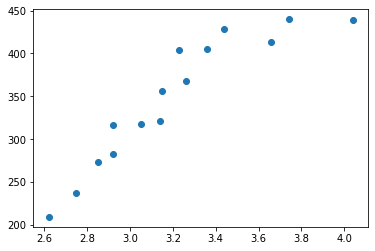

In [240]:
t = np.array([2.62,2.75,2.85,2.92,2.92,3.05,3.14,3.15,3.23,3.26,3.36,3.44,3.66,3.74,4.04])
I = np.array([209,237,273,316,283,317,321,356,404,368,405,429,413,440,439])

plt.plot(t, I, 'o')

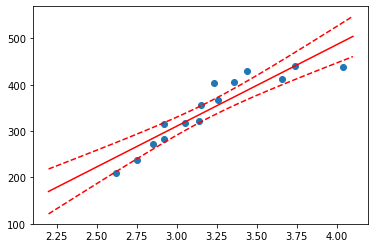

In [234]:
from scipy import stats

j = np.ones(len(t)).reshape(-1,1)
tc = (t - np.mean(t)).reshape(-1,1)

X = np.concatenate([j, tc], axis=1)

beta = np.linalg.inv(X.T@X)@(X.T@I.reshape(-1,1))

XX_inv = np.linalg.inv(X.T@X)
n_inv = XX_inv[0,0]
Sxx_inv = XX_inv[1,1]

S = (I.reshape(-1,1) - X@beta).T@(I.reshape(-1,1) - X@beta)
nu = len(X) - np.linalg.matrix_rank(X)
sigma2 = S[0] / nu


xx = np.arange(2.2,4.2,0.1)
XX = np.array([np.ones(len(xx)), (xx-np.mean(t))]).T

y = (XX@beta).ravel()
s = np.sqrt((n_inv+(xx-np.mean(t))**2*Sxx_inv)*sigma2)
t_value = stats.t.ppf(0.975, df=nu)

plt.plot(t, I, 'o')
plt.plot(xx, y, color='red')
plt.plot(xx,y+t_value*s,xx,y-t_value*s, linestyle='--', color='red');

### 正規線形モデルと標本分布
前節まで扱った線形モデル
$$
\boldsymbol{y}=\boldsymbol{X}\boldsymbol{\theta}+\boldsymbol{\varepsilon}
$$
では、誤差に対し不偏性$E(\boldsymbol{\varepsilon})=\boldsymbol{0}$、等分散、無相関性$V(\boldsymbol{\varepsilon})=\sigma^2\boldsymbol{I}$だけを仮定していたが、これに加え正規分布であるとしたモデルを正規線形モデルという。
#### 最小二乗推定量の標本分布
最小二乗推定量は、$\boldsymbol{y}$の線形結合だから、再び正規分布に従うので、平均と分散が求まれば標本分布が定まることになる。
任意の推定可能関数$\boldsymbol{l}'\boldsymbol{\theta}$についても、そのBLUEであるさいしょう$\boldsymbol{l}'\hat{\boldsymbol{\theta}}$の期待値は$\boldsymbol{l}'\boldsymbol{\theta}$、分散は、$\boldsymbol{l}'\hat{\boldsymbol{\theta}}$が
$$
\boldsymbol{l}'\hat{\boldsymbol{\theta}}=\sum L_iy_i
$$
のように表現されているときには
$$
V(\sum L_iy_i)=\sum L_i^2\sigma^2
$$
と表される。
したがって、最小二乗推定量$\boldsymbol{l}'\hat{\boldsymbol{\theta}}$は正規分布
$$
N(\boldsymbol{l}'\boldsymbol{\theta},\sum L_i^2\sigma^2)
$$
に従う。
#### 残差平方和の標本分布
残差平方和
$$
S(\hat{\boldsymbol{\theta}})=(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}})'(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{\theta}})
$$
を自由度
$$
\nu_e=n-q,\hspace{5mm}q=rank(\boldsymbol{X})
$$
で除した
$$
S(\hat{\boldsymbol{\theta}})/\nu_e
$$
は$\sigma^2$の不偏推定量である。
ここで誤差に正規性を仮定すると、これが$\sigma^2$のあらゆる不偏推定量の中で最小分散であるといえる。
$\sigma^2$を推定する残差平方和について、
$$
S(\hat{\boldsymbol{\theta}})/\sigma^2
$$
の分布は自由度$\nu_e$の$\chi^2$分布$\chi^2(\nu_e)$に従う。
不偏分散$\hat{\sigma}^2$もあらゆる$\sigma^2$の不偏推定量のクラスで最小分散であり、自由度$\nu$の$\chi^2$分布$\chi^2(\nu)$の分散が$2\nu$であることから、この$\hat{\sigma}^2$分散は
$$
V(\hat{\sigma}^2)=(\sigma^2/\nu_e)^2・2\nu_e=2\sigma^4/\nu_e
$$
で与えられる、さらに
$$
Cov(\boldsymbol{X}\hat{\boldsymbol{\theta}},\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{X}})=Cov(\Pi_\boldsymbol{X}\boldsymbol{y},(\boldsymbol{I}-\Pi_\boldsymbol{X})\boldsymbol{y})=\sigma^2\Pi_\boldsymbol{X}(\boldsymbol{I}-\Pi_\boldsymbol{X})=0
$$
となることから、$\hat{\sigma}^2$は$\boldsymbol{X}\hat{\boldsymbol{\theta}}$の各要素と独立であることもわかる。

### 統計仮説の検定
#### t検定とF検定
一般の線形モデルにおける線形制約
$$
H_0:\boldsymbol{K}\boldsymbol{\theta}=\boldsymbol{0}
$$
は線形仮説と呼ばれる。

たとえば、2次回帰モデルにおいて、2次の項がないという仮説
$$
H_0:\beta_2=0
$$
は、
$$
0・\beta_0+0・\beta_1+1・\beta_2=0
$$
と表される。

線形仮説の検定は、ある推定可能関数に関する帰無仮説
$$
H_0:\boldsymbol{l}'\boldsymbol{\theta}=0
$$
の検定に他ならない。
そこでBLUEを$\boldsymbol{y}$の関数として
$$
\boldsymbol{l}'\hat{\boldsymbol{\theta}}=\boldsymbol{L}'\boldsymbol{y}
$$
と表すと、その仮説のもとでの分布は正規分布$N(0,\boldsymbol{L}'\boldsymbol{L}\sigma^2)$である。
したがって、標準偏差で基準化した統計量
$$
Z=\frac{\boldsymbol{L}'\boldsymbol{y}}{\sqrt{\boldsymbol{L}'\boldsymbol{L}\sigma^2}}
$$
は帰無仮説のもとで標準正規分布に従う。
また、$\boldsymbol{L}'\boldsymbol{y}$とは独立な不偏分散$\hat{\sigma}^2$を$\sigma^2$に代入した
$$
t=\frac{\boldsymbol{L}'\boldsymbol{y}}{\sqrt{\boldsymbol{L}'\boldsymbol{L}\sigma^2}}
$$
は自由度$\nu_e$の$t$分布$t(\nu_e)$に従う。
右片側検定の棄却域$R_1$は
$$
t>t_\alpha(\nu_e)
$$
であえり、両側検定の棄却域$R_2$は
$$
|t|>t_{\alpha/2}(\nu_e)
$$
となる。

一般の次元の帰無仮説についても、BLUEに基づく2次形式統計量から$F$検定を考えることができる。
まず、帰無仮説を
$$
H_0:E(\boldsymbol{y})=\boldsymbol{X}_0\boldsymbol{\theta}_0
$$
のように表し
$$
rank(\boldsymbol{X}_0)=p
$$
とする。基本モデルのランクは
$$
rank(\boldsymbol{X})=q
$$
とする。当然$p>q$である。
このとき、ランクの差
$$
s=q-p
$$
は基本モデルのうち仮説でゼロと置かれた部分のランクを表し、仮説の自由度と呼ばれる。
次に基本モデル及び仮説モデルの下でそれぞれ最小二乗法により期待値を推定し、残差平方和$S_e$および$S_0$を求める。このとき$S_0>S_e$である。
$(S_0-S_e)/\sigma^2$は$H_0$の下で自由度$s$の$\chi^2$分布$\chi^2(s)$に従う。
$H_0$の下で$F$分布に従う統計量
$$
F=\biggl(\frac{S_0-S_e}{q-p} \biggr)/\biggl(\frac{S_e}{n-q} \biggr)
$$
が定義される。
$F$は$H_0$が真でないときには非心$F$分布に従って、統計的により大きな値を取る。
そこで$F$分布$F(q-p,n-q)$のパーセント点を参照して検定することができる。

In [250]:
t = beta[1]/np.sqrt(Sxx_inv*sigma2)
print(t[0])

S0 = ((I-np.mean(I))**2).sum()
Se = S[0][0]

F = (S0 - Se)/(Se/(len(I)-2))
print(F)

8.454744757723208
71.48270891824806
